In [3]:
import netpixi
from graph_tool import draw
import graph_tool_extras as gte

import distribution as dst
from graph_tool import centrality

In [4]:
g = gte.load('./rede.net.gz')

In [5]:
print(f'Número de Verticies: {g.num_vertices()}')
print(f'Número de Arestas: {g.num_edges()}')

Número de Verticies: 17903
Número de Arestas: 197031


In [6]:
print(f'Densidade: {g.density()}%')

Densidade: 0.122952%


In [7]:
print(f'Transitividade: {g.transitivity()}%')

Transitividade: 31.777791%


In [8]:
degrees = g.get_total_degrees()
degrees.describe()

count    17903.000000
mean        22.010948
std         31.016923
min          1.000000
25%          4.000000
50%         10.000000
75%         28.000000
max        504.000000
dtype: float64

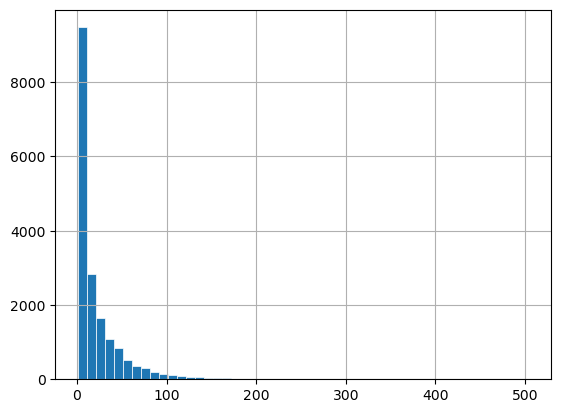

In [9]:
degrees.hist(bins=50, edgecolor='white', linewidth=0.5);

In [10]:
p_value = dst.not_normal(degrees)
print(f'Not Normal: {'<0.001' if p_value < 0.001 else float(p_value)}')

Not Normal: <0.001


In [11]:
powerlaw, p_value = dst.more_powerlaw_than_lognormal(degrees)
print(f'More Powerlaw than Lognormal: {'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

More Powerlaw than Lognormal: 0.8680756462375805 


Calculating best minimal value for power law fit
/opt/miniconda/envs/jupyterlab/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [12]:
powerlaw, p_value = dst.more_powerlaw_than_exponential(degrees)
print(f'More Powerlaw than Exponential: {'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

More Powerlaw than Exponential: 0.014483332945893693 [powerlaw]


Calculating best minimal value for power law fit


In [ ]:
distances = g.get_distances()
distances.describe()

In [ ]:
distances.hist()

## Closeness

Primeiro, calculamos a centralidade _closeness_ com `closeness`.

In [13]:
c = centrality.closeness(g, harmonic=True)

Depois, adicionamos a propriedade de vértice ao grafo com `add_vp`.

In [14]:
g.add_vp('closeness', c)

Então, salvamos a rede modificada para podermos visualizá-la.

In [16]:
gte.save(g, 'closeness.net.gz')

Para visualizar a rede, precisamos descomentar as linhas abaixo quando nenhuma outra visualização estiver rodando.

In [19]:
# rb = netpixi.render('closeness.net.gz')

In [18]:
# rb.vertex_scale('closeness', 10, 30)

## Betweeness

Agora, para calcularmos o _betweeness_, utilizamos a função `betweenness`.

In [21]:
b, _ = centrality.betweenness(g)

Novamente, precisamos adicionar a propriedade de vértice ao grafo com `add_vp`.

In [22]:
g.add_vp('betweenness', b)

Salvando a rede:

In [23]:
gte.save(g, 'betweenness.net.gz')

E por fim, executandos o `render`.

In [27]:
# rb = netpixi.render('betweenness.net.gz', )

In [28]:
# rb.vertex_scale('betweenness', 10, 30)

## Degrees

Para calcular a centralidade _degree_, utilizamos a função `total_degree`.

In [29]:
d = gte.total_degree(g)

Adicionamos a propriedade ao grafo.

In [30]:
g.add_vp('degree', d)

Salvamos a rede:

In [31]:
gte.save(g, 'degree.net.gz')

E executamos a visualização com `render`, ajustando a escala dos vértices com `vertex_scale`.

In [32]:
# rd = netpixi.render('degree.net.gz')

In [ ]:
# rd.vertex_scale('degree', 10, 30)